In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 1)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
number_codes = []
for i in range(2**5, 2**6-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**5 - 1,6).T.tolist() 

In [7]:
classes = []
for i in range(2**5 - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []
#classes = [[0],[0,5],[0,4],[0,4,5],[0,3],[0,3,5],[0,3,4],[0,3,4,5],[0,2],[0,2,5],[0,2,4],[0,2,4,5],[0,2,3],[0,2,3,5],[0,2,3,4],[0,2,3,4,5],[0,1],[0,1,5],[0,1,4],[0,1,4,5],[0,1,3],[0,1,3,5],[0,1,3,4],[0,1,3,4,5],[0,1,2],[0,1,2,5],[0,1,2,4],[0,1,2,4,5],[0,1,2,3],[0,1,2,3,5],[0,1,2,3,4]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.60993 stdev: 0.22588
Best fitness: 0.87306 - size: (2, 7) - species 5 - id 170
Average adjusted fitness: 0.487
Mean genetic distance 2.925, standard deviation 0.492
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 11.167 sec
number of class1:2110
number of class2:2325

 ****** Running generation 0 ****** 

Population's average fitness: 0.51409 stdev: 0.03158
Best fitness: 0.61714 - size: (2, 7) - species 2 - id 4
Average adjusted fitness: 0.210
Mean genetic distance 2.863, standard deviation 0.527
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.620 sec
number of class1:1542
number of class2:2893

 ****** Running generation 0 ****** 

Population's average fitness: 0.56782 stdev: 0.13072
Best fitness: 0.78106 - size: (2, 7) - species 7 - id 101
Average adjusted fitness: 0.269
Mean genetic distance 2.857, standard 

Population's average fitness: 0.36342 stdev: 0.23236
Best fitness: 0.78354 - size: (2, 7) - species 5 - id 57
Average adjusted fitness: 0.118
Mean genetic distance 2.823, standard deviation 0.462
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 10.773 sec
number of class1:2512
number of class2:1923

 ****** Running generation 0 ****** 

Population's average fitness: 0.47176 stdev: 0.06354
Best fitness: 0.70530 - size: (2, 7) - species 6 - id 189
Average adjusted fitness: 0.188
Mean genetic distance 2.811, standard deviation 0.480
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.296 sec
number of class1:3550
number of class2:885

 ****** Running generation 0 ****** 

Population's average fitness: 0.37431 stdev: 0.26122
Best fitness: 0.80316 - size: (2, 7) - species 4 - id 91
Average adjusted fitness: 0.158
Mean genetic distance 2.811, standard deviation 0.467
Population of 201 members in 19 species
Total extinctions: 0
Generat

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
# number_codes = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
# [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1],
# [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1],
# [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]

In [14]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(31):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [20]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/2000

In [16]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:8 index:[0] real:2
#1 min_error:8 index:[0] real:2
#2 min_error:9 index:[0 5] real:3
#3 min_error:7 index:[5] real:3
#4 min_error:7 index:[5] real:3
#5 min_error:6 index:[5] real:3
#6 min_error:9 index:[0 5] real:3
#7 min_error:7 index:[5] real:3
#8 min_error:8 index:[2 5] real:3
#9 min_error:8 index:[2 5] real:3
#10 min_error:9 index:[2 3 5] real:3
#11 min_error:8 index:[5] real:3
#12 min_error:8 index:[5] real:3
#13 min_error:7 index:[5] real:3
#14 min_error:9 index:[2 5] real:2
#15 min_error:9 index:[0 2 5] real:2
#16 min_error:8 index:[5] real:2
#17 min_error:8 index:[2 5] real:2
#18 min_error:7 index:[5] real:2
#19 min_error:7 index:[5] real:2
#20 min_error:9 index:[2 5] real:2
#21 min_error:8 index:[2 5] real:2
#22 min_error:9 index:[2 5] real:2
#23 min_error:7 index:[2] real:2
#24 min_error:8 index:[2 5] real:2
#25 min_error:9 index:[2 5] real:2
#26 min_error:8 index:[2 5] real:2
#27 min_error:7 index:[5] real:4
#28 min_error:9 index:[2 3 5] real:5
#29 min_error:8 i

#398 min_error:8 index:[2 5] real:2
#399 min_error:7 index:[2] real:2
#400 min_error:7 index:[2] real:2
#401 min_error:8 index:[3] real:5
#402 min_error:6 index:[5] real:4
#403 min_error:6 index:[5] real:5
#404 min_error:6 index:[5] real:5
#405 min_error:9 index:[2 3 5] real:5
#406 min_error:8 index:[2 5] real:5
#407 min_error:7 index:[5] real:5
#408 min_error:7 index:[5] real:5
#409 min_error:7 index:[2] real:5
#410 min_error:8 index:[2 5] real:2
#411 min_error:8 index:[2 5] real:2
#412 min_error:1 index:[1] real:1
#413 min_error:1 index:[1] real:1
#414 min_error:1 index:[1] real:1
#415 min_error:1 index:[1] real:1
#416 min_error:3 index:[1] real:1
#417 min_error:1 index:[1] real:1
#418 min_error:1 index:[1] real:1
#419 min_error:3 index:[1] real:1
#420 min_error:7 index:[5] real:1
#421 min_error:7 index:[5] real:2
#422 min_error:7 index:[5] real:2
#423 min_error:8 index:[2 5] real:2
#424 min_error:8 index:[5] real:2
#425 min_error:7 index:[2] real:2
#426 min_error:8 index:[2 5] real:

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[461   8  36  15  85  16]
 [  0 206   0   0   6   0]
 [  0   4 113  77  15 128]
 [  0   0   5   1   7  15]
 [  0   1   0   0  12   0]
 [  0   5 243 118 112 311]]


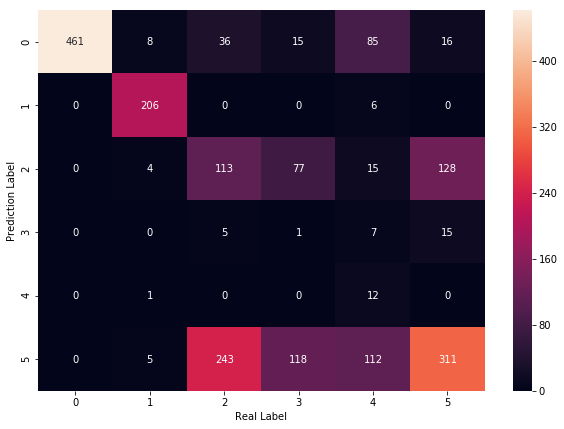

In [18]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [23]:

def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs


# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []


for j in range(4435):
    pred = []
    for i in range(31):
        [pred_outputs] = get_pred_train(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/4435
print("Test Accuracy:{}".format(train_acc))

winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))


# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
    print(item)

Test Accuracy:0.5641488162344983
Avg Train Accuracy:0.7685202022038768
Total nodes:267 Total connections::217
0.7685202022038768
0.5641488162344983
0.0
267
217
